# spaCy experiments

## Imports & initialization

Import the required modules.

In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import spacy

Create a language model, English in this case.

In [2]:
en_nlp = spacy.load('en_core_web_sm')

## Part of speech tagging (POS)

Read a text file into a string variable.

In [3]:
with open('Data/frost.txt') as file:
    text = ''.join(file.readlines())

Parse the text using the language model.

In [4]:
doc = en_nlp(text)

Show the part of speech tags, as well as the context of the words.

In [5]:
for word in doc:
    print(f'{word.text!r}: {word.pos_}, '
          f'{word.left_edge.text!r} <- {word.head.text!r} -> {word.right_edge.text!r}')

'Two': NUM, 'Two' <- 'roads' -> 'Two'
'roads': NOUN, 'Two' <- 'roads' -> '\n'
'diverged': VERB, 'diverged' <- 'roads' -> 'wood'
'in': ADP, 'in' <- 'diverged' -> 'wood'
'a': DET, 'a' <- 'wood' -> 'a'
'yellow': ADJ, 'yellow' <- 'wood' -> 'yellow'
'wood': NOUN, 'a' <- 'in' -> 'wood'
',': PUNCT, ',' <- 'roads' -> '\n'
'\n': SPACE, '\n' <- ',' -> '\n'
'And': CCONJ, 'And' <- 'sorry' -> 'And'
'sorry': INTJ, 'And' <- 'travel' -> 'sorry'
'I': PRON, 'I' <- 'travel' -> 'I'
'could': VERB, 'could' <- 'travel' -> 'could'
'not': ADV, 'not' <- 'travel' -> 'not'
'travel': VERB, 'And' <- 'travel' -> '\n'
'both': DET, 'both' <- 'travel' -> '\n'
'\n': SPACE, '\n' <- 'both' -> '\n'
'And': CCONJ, 'And' <- 'travel' -> 'And'
'be': VERB, 'be' <- 'travel' -> '\n'
'one': NUM, 'one' <- 'traveler' -> 'one'
'traveler': NOUN, 'one' <- 'be' -> 'traveler'
',': PUNCT, ',' <- 'stood' -> ','
'long': ADV, 'long' <- 'stood' -> 'long'
'I': PRON, 'I' <- 'stood' -> 'I'
'stood': VERB, ',' <- 'be' -> '\n'
'\n': SPACE, '\n' <- '

Since we can't use backslashes in f-strings, we define a constant to represent it.

In [6]:
newline = '\n'

To split a text in sentences, a statistical model is used that was obtained from the training corpus.

In [7]:
for i, sentence in enumerate(doc.sents):
    print(f'{i:3d} {sentence.text.replace(newline, " ")}')

  0 Two roads diverged in a yellow wood, 
  1 And sorry I could not travel both And be one traveler, long I stood And looked down one as far as I could 
  2 To where it bent in the undergrowth;  Then took the other, as just as fair, And having perhaps the better claim, Because it was grassy and wanted wear; Though as for that the passing there Had worn them really about the same,  And both that morning equally lay 
  3 In leaves no step had trodden black. 
  4 Oh, I kept the first for another day! 
  5 Yet knowing how way leads on to way, I doubted if I should ever come back.  
  6 I shall be telling this with a sigh Somewhere ages and ages hence: 
  7 Two roads diverged in a wood, and I— 
  8 I took the one less traveled by, And that has made all the difference.


For poetry, sentences seem somewhat hard to detect.  However, it is possible to define a language model for English and add a rule-based sentencizer to it.

In [8]:
en_nlp_alt = spacy.lang.en.English()
sentencizer = en_nlp_alt.create_pipe('sentencizer')
en_nlp_alt.add_pipe(sentencizer)
doc = en_nlp_alt(text)
for i, sentence in enumerate(doc.sents):
    print(f'{i:3d} {sentence.text.replace(newline, " ").strip()}')

  0 Two roads diverged in a yellow wood, And sorry I could not travel both And be one traveler, long I stood And looked down one as far as I could To where it bent in the undergrowth;  Then took the other, as just as fair, And having perhaps the better claim, Because it was grassy and wanted wear; Though as for that the passing there Had worn them really about the same,  And both that morning equally lay In leaves no step had trodden black.
  1 Oh, I kept the first for another day!
  2 Yet knowing how way leads on to way, I doubted if I should ever come back.
  3 I shall be telling this with a sigh Somewhere ages and ages hence: Two roads diverged in a wood, and I— I took the one less traveled by, And that has made all the difference.


## Named entiry recognition (NER)

Named entity recognition is supported as well.

In [9]:
sentence = 'Music by Johann Sebastian Bach is better than that by Friederich Buxtehude. Both lived in Germany'

In [10]:
doc = en_nlp(sentence)

In [11]:
for i, word in enumerate(doc):
    print(f'{i:3d} {word.text!r}: {word.pos_}, {word.ent_type_}')

  0 'Music': NOUN, 
  1 'by': ADP, 
  2 'Johann': PROPN, PERSON
  3 'Sebastian': PROPN, PERSON
  4 'Bach': PROPN, PERSON
  5 'is': VERB, 
  6 'better': ADJ, 
  7 'than': ADP, 
  8 'that': DET, 
  9 'by': ADP, 
 10 'Friederich': PROPN, PERSON
 11 'Buxtehude': PROPN, PERSON
 12 '.': PUNCT, 
 13 'Both': DET, 
 14 'lived': VERB, 
 15 'in': ADP, 
 16 'Germany': PROPN, GPE


It is also possible to retrieve named entities from the document explicitly.

In [12]:
for entity in doc.ents:
    print(f'{entity} ({entity.label_}): {entity.start} -> {entity.end}')

Johann Sebastian Bach (PERSON): 2 -> 5
Friederich Buxtehude (PERSON): 10 -> 12
Germany (GPE): 16 -> 17


This can also be visualized as markup in the sentence.

In [13]:
spacy.displacy.render(doc, style='ent', jupyter=True)

In [14]:
spacy.displacy.render(doc, style='dep', jupyter=True,
                      options={'distance': 140, 'compact': True})

## Similarity

Document similarity can also be computed conveniently.

In [15]:
doc1 = en_nlp('The book is nice')
doc2 = en_nlp('The novel is beautiful')
doc1.similarity(doc2)

0.8147012719178897

In [16]:
doc1 = en_nlp('The book is nice')
doc2 = en_nlp('The house is on fire')
doc1.similarity(doc2)

0.7543920170936133

In [17]:
words = ['queen', 'lady', 'girl', 'king', 'lord', 'boy', 'cat', 'dog', 'lion']
similarity = np.empty((len(words), len(words)))
for i, word1 in enumerate(words):
    for j, word2 in enumerate(words):
        similarity[i, j] =  en_nlp(word1).similarity(en_nlp(word2))

The similarity matrix can be visualized as a heat map using the following function:

In [18]:
def plot_similarity_matrix(sim, words, cmap=plt.cm.Blues):
    figure, axes = plt.subplots(figsize=(6, 6))
    axes.imshow(sim, interpolation='nearest', cmap=cmap)
    axes.set_xticks(range(len(words)))
    axes.set_xticklabels(words, rotation=45)
    axes.set_yticks(range(len(words)))
    axes.set_yticklabels(words)
    fmt = '{0:.2f}'
    thresh = 0.5*(sim.max() + sim.min())
    for i, j in itertools.product(range(sim.shape[0]), range(sim.shape[1])):
        axes.text(j, i, fmt.format(sim[i, j]),
                  horizontalalignment="center",
                  color="white" if sim[i, j] > thresh else "black",
                  fontsize=8)
    figure.tight_layout()
    axes.set_xlabel('word 1')
    axes.set_ylabel('word 2')

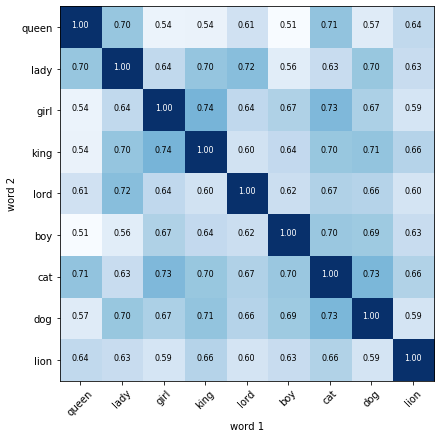

In [19]:
plot_similarity_matrix(similarity, words)